### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

TSNE on COIL-20 dataset


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Time: 2.71 s

TSNE on MNIST dataset


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Time: 3.73 s

TSNE on F-MNIST dataset


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Time: 23.94 s

PCA on COIL-20 dataset
Time: 0.12 s

PCA on MNIST dataset
Time: 0.02 s

PCA on F-MNIST dataset
Time: 0.27 s



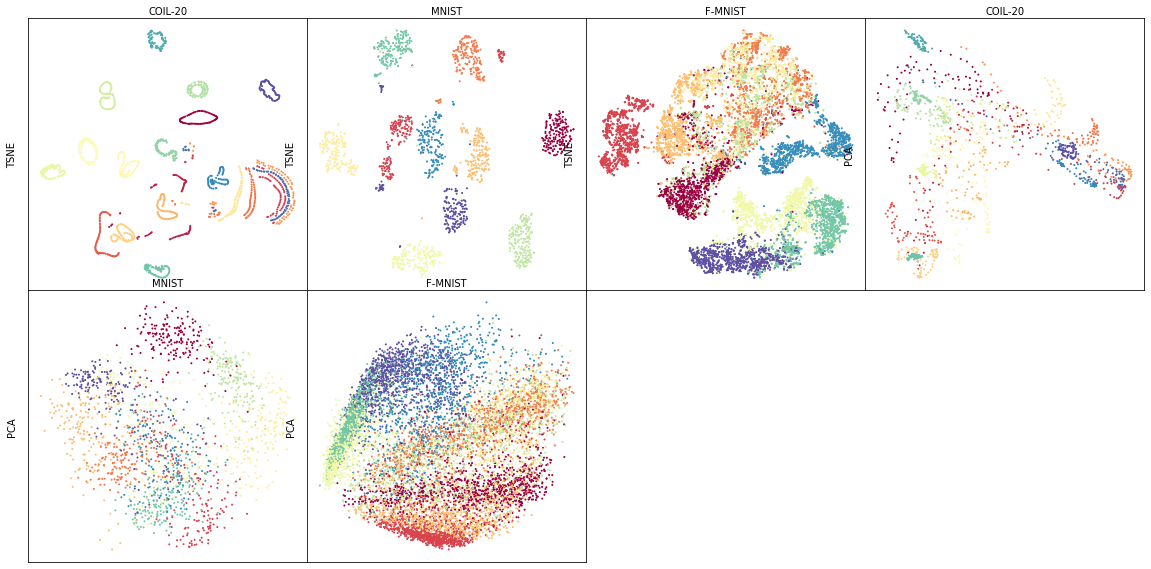

In [2]:
import pandas as pd
import dataget
import time
from scipy import io
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

coil20 = io.loadmat("COIL20.mat")

mnist_dataset = load_digits()
mnist_x = pd.DataFrame(mnist_dataset.data)

_, _, f_mnist_x, f_mnist_y = dataget.image.fashion_mnist().get()
f_mnist_x = f_mnist_x.reshape(-1, 28*28)

data = [
  ("COIL-20", coil20['X'], coil20['Y']),
  ("MNIST", mnist_x, mnist_dataset.target),
  ("F-MNIST", f_mnist_x, f_mnist_y)
]

algs = [
  ("UMAP", umap.UMAP()),
  ("TSNE", TSNE(n_jobs=-1, random_state=2)),
  ("PCA", PCA(n_components=2))
]


fig = plt.figure(figsize=(20, 15), constrained_layout=False)
spec = gridspec.GridSpec(3, 4, wspace=0.0, hspace=0.0)

cnt = 0

for i in range(len(algs)):
  for j in range(len(data)):

    subplt = fig.add_subplot(spec[cnt])
    subplt.set_xlabel(data[j][0])
    subplt.xaxis.set_label_position('top')
    subplt.set_ylabel(algs[i][0])

    print(f"{algs[i][0]} on {data[j][0]} dataset")
    start = time.time()
    embeddings = algs[i][1].fit_transform(data[j][1])
    subplt.scatter(embeddings[:, 0], embeddings[:, 1], c=data[j][2], cmap='Spectral', s=1)
    subplt.set_yticklabels([])
    subplt.set_xticklabels([])
    subplt.tick_params(left = False, bottom=False)
    t = time.time() - start
    print(f"Time: {round(t, 2)} s\n")
    cnt += 1